In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as col

In [3]:
plt.rcParams['pgf.rcfonts'] = False
plt.rcParams['font.serif'] = []
plt.rcParams['text.usetex'] = True
#plt.rcParams['figure.figsize'] = 3.5, 2.625
plt.rcParams['axes.formatter.useoffset'] = False
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['errorbar.capsize'] = 2
plt.rcParams['grid.linewidth'] = 0.5
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.title_fontsize'] = 12
plt.rcParams['legend.fontsize'] = 12
#plt.rcParams['legend.frameon'] = False

In [5]:
dimension_description =np.load("results/pvalues_binned/dimension_description.npy", allow_pickle=True)
expected_pvalue =np.load("results/pvalues_binned/expected_pvalue.npy")
expected_pvalue_corrpos =np.load("results/pvalues_binned/expected_pvalue_corrpos.npy")
observed_pvalue_likelihood_ratio = np.load("results/pvalues_binned/observed_pvalue_likelihood_ratio.npy")
observed_pvalue_maxbin = np.load("results/pvalues_binned/observed_pvalue_maxbin.npy")
chosen_bin_match = np.load("results/pvalues_binned/chosen_bin_match.npy")

In [6]:
print(dimension_description)

{'signal_positions': array([1. , 1.5, 2. , 2.5, 3. ]), 'signal_widths': array([0.01 , 0.02 , 0.03 , 0.04 , 0.05 , 0.075, 0.1  , 0.2  , 0.3  ,
       0.4  , 0.5  , 1.   ]), 'N_bins': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55,
       56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72,
       73, 74, 75]), 'N_sig': array([316])}


In [7]:
col_exp = "black"
col_obs_lik = "red"
col_obs_bin = "blue"

colormap = col.get_cmap("viridis")

/tmp/zu992399/login23-3_69050/ipykernel_248210/964519412.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = col.get_cmap("viridis")


In [8]:
bin_edges = 7
N_bkg = 100000
N_tests = 10
signal_positions = np.arange(1, 3, 0.5)
signal_widths = np.array([0.01, 0.05, 0.1, 0.3, 0.5, 1.])
N_bins = np.arange(5,51, 1)
N_sig = np.array([50,100,200])#, 200, 500, 1000, 2000, 5000])

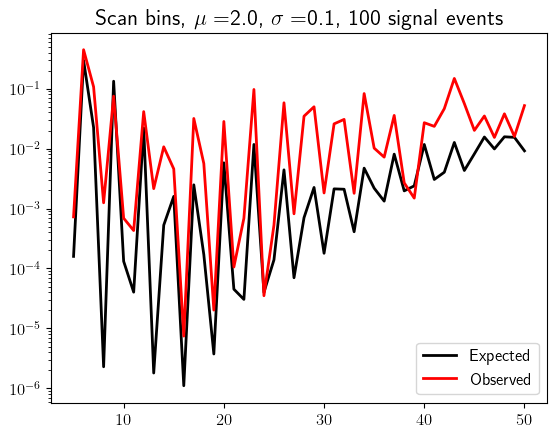

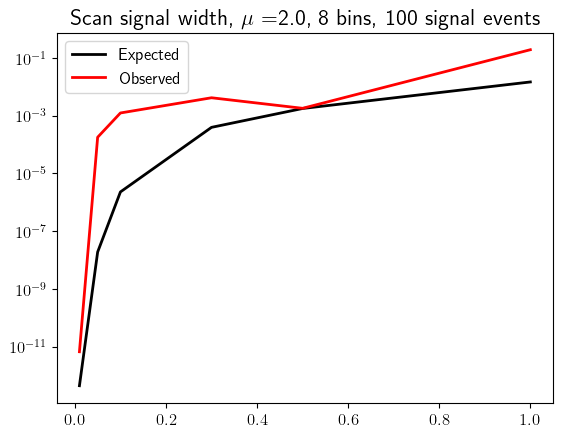

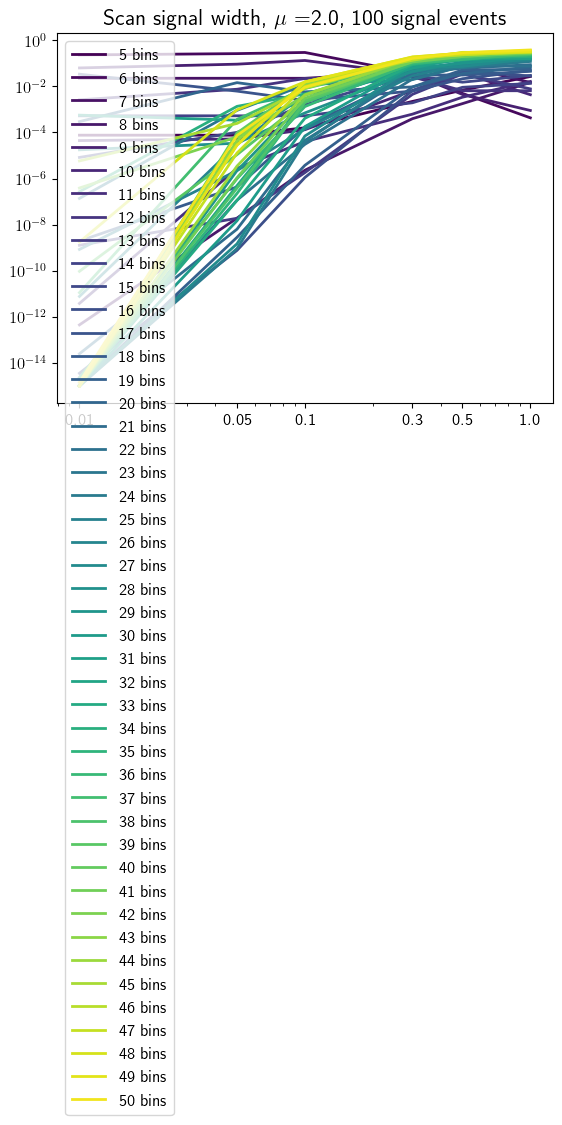

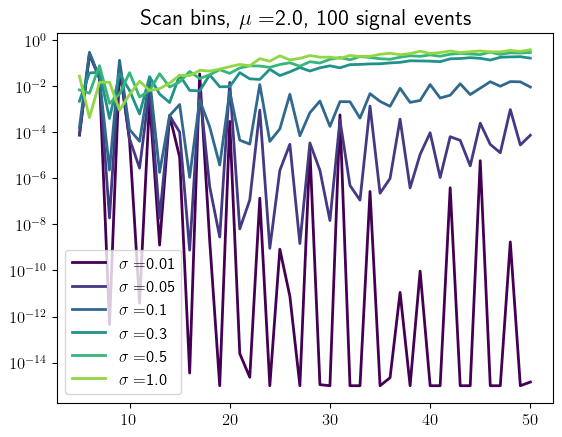

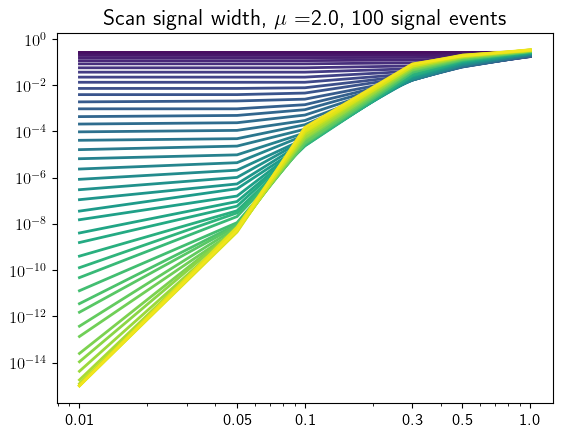

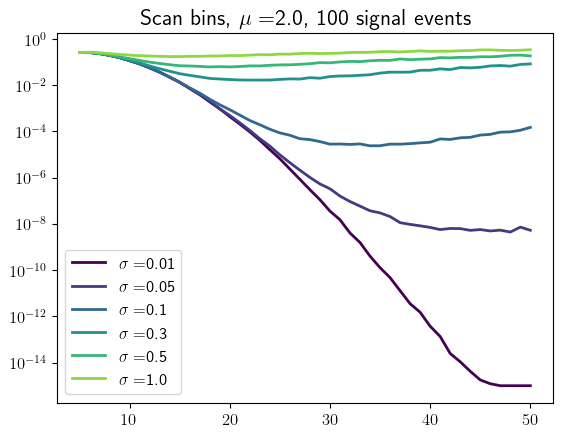

In [9]:
#for i, p in enumerate(signal_positions):
#    fig, ax = plt.subplots(len(signal_widths), len(N_sig), figsize=(15,8))
#    for j, w in enumerate(signal_widths):
#        for k, s in enumerate(N_sig):
#            ax[j,k].scatter(N_bins,expected_pvalue[i,j,:,k], marker='.', color=col_exp)
#            ax[j,k].scatter(N_bins,np.mean(observed_pvalue_likelihood_ratio[i,j,:,k], axis=-1), marker='.', color=col_obs_lik)
#            ax[j,k].scatter(N_bins,np.mean(observed_pvalue_maxbin[i,j,:,k], axis=-1), marker='.', color=col_obs_bin)
            #ax[j,k].set_yscale("log")

#default_inds = [1, 1, :, 0]

ind_pos = 2
ind_width = 2
ind_sig = 1
ind_bins=3

eps=1e-15
plt.figure()
plt.title(r"Scan bins, $\mu=$"+str(signal_positions[ind_pos])+", $\sigma=$"+str(signal_widths[ind_width])+", "+str(N_sig[ind_sig])+" signal events")
plt.plot(N_bins, expected_pvalue[ind_pos,ind_width,:,ind_sig]+eps, label="Expected", color=col_exp)
plt.plot(N_bins, np.mean(observed_pvalue_likelihood_ratio[ind_pos,ind_width,:,ind_sig], axis=-1)+eps, label="Observed", color=col_obs_lik)
plt.yscale("log")
#plt.xticks(N_bins, N_bins)
plt.legend()

plt.figure()
plt.title(r"Scan signal width, $\mu=$"+str(signal_positions[ind_pos])+", "+str(N_bins[ind_bins])+" bins, "+str(N_sig[ind_sig])+" signal events")
plt.plot(signal_widths, expected_pvalue[ind_pos,:, ind_bins,ind_sig]+eps, label="Expected", color=col_exp)
plt.plot(signal_widths, np.mean(observed_pvalue_likelihood_ratio[ind_pos,:, ind_bins,ind_sig], axis=-1)+eps, label="Observed", color=col_obs_lik)
plt.yscale("log")
plt.legend()

plt.figure()
plt.title(r"Scan signal width, $\mu=$"+str(signal_positions[ind_pos])+", "+str(N_sig[ind_sig])+" signal events")
for i, sigma in enumerate(N_bins):
    plt.plot(signal_widths, expected_pvalue[ind_pos,:,i, ind_sig]+eps, label=str(sigma)+" bins", color=colormap(i/len(N_bins)))
#plt.plot(signal_widths, np.mean(observed_pvalue_likelihood_ratio[1,:,2,0], axis=-1)+eps, label="Observed", color=col_obs_lik)
plt.yscale("log")
plt.xscale("log")
plt.xticks(signal_widths, signal_widths)
plt.legend()


plt.figure()
plt.title(r"Scan bins, $\mu=$"+str(signal_positions[ind_pos])+", "+str(N_sig[ind_sig])+" signal events")
for i, sigma in enumerate(signal_widths):
    plt.plot(N_bins, expected_pvalue[ind_pos,i,:, ind_sig]+eps, label=r"$\sigma=$"+str(sigma), color=colormap(i/len(signal_widths)))
#plt.plot(signal_widths, np.mean(observed_pvalue_likelihood_ratio[1,:,2,0], axis=-1)+eps, label="Observed", color=col_obs_lik)
plt.yscale("log")
#plt.xscale("log")
#plt.xticks(N_bins, N_bins)
plt.legend()

plt.figure()
plt.title(r"Scan signal width, $\mu=$"+str(signal_positions[ind_pos])+", "+str(N_sig[ind_sig])+" signal events")
for i, sigma in enumerate(N_bins):
    plt.plot(signal_widths, expected_pvalue_corrpos[ind_pos,:,i, ind_sig]+eps, label=str(sigma)+" bins", color=colormap(i/len(N_bins)))
#plt.plot(signal_widths, np.mean(observed_pvalue_likelihood_ratio[1,:,2,0], axis=-1)+eps, label="Observed", color=col_obs_lik)
plt.yscale("log")
plt.xscale("log")
plt.xticks(signal_widths, signal_widths)
#plt.legend()

plt.figure()
plt.title(r"Scan bins, $\mu=$"+str(signal_positions[ind_pos])+", "+str(N_sig[ind_sig])+" signal events")
for i, sigma in enumerate(signal_widths):
    plt.plot(N_bins, expected_pvalue_corrpos[ind_pos,i,:, ind_sig]+eps, label=r"$\sigma=$"+str(sigma), color=colormap(i/len(signal_widths)))
#plt.plot(signal_widths, np.mean(observed_pvalue_likelihood_ratio[1,:,2,0], axis=-1)+eps, label="Observed", color=col_obs_lik)
plt.yscale("log")
#plt.xscale("log")
#plt.xticks(N_bins, N_bins)
plt.legend()

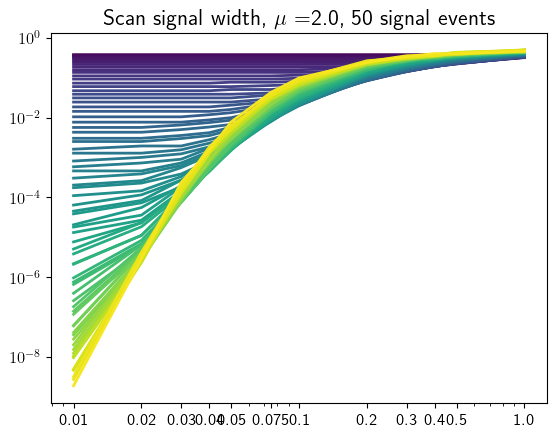

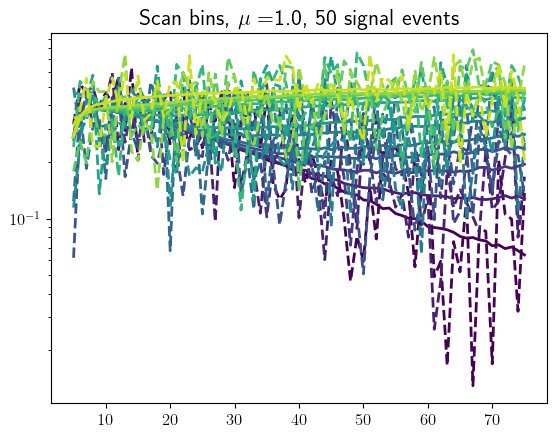

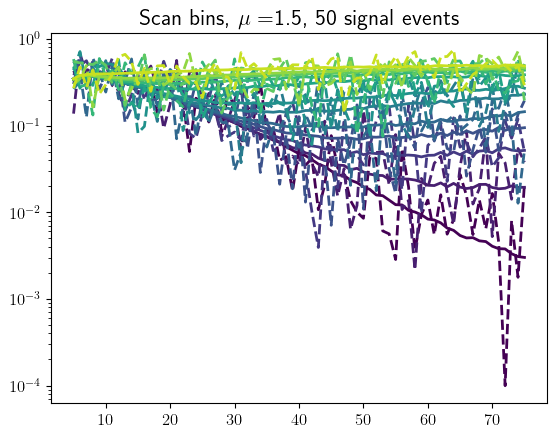

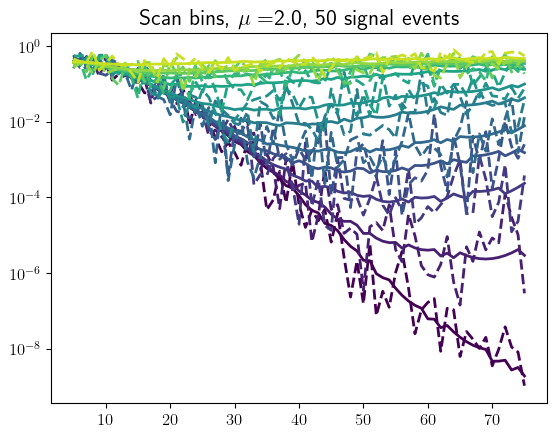

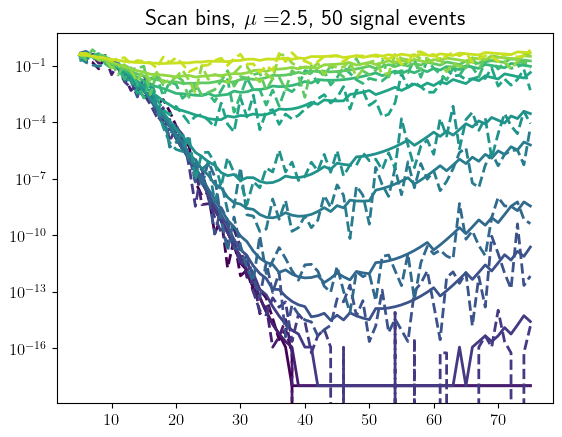

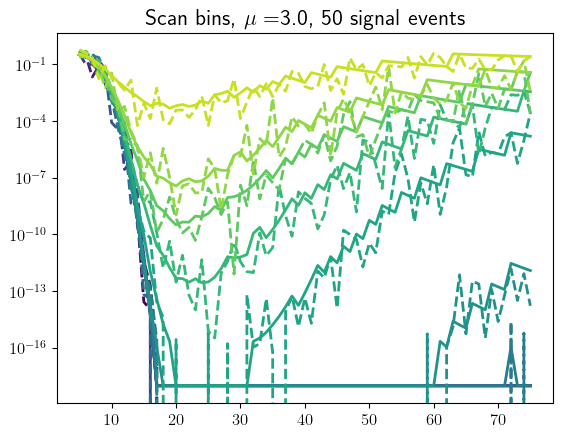

In [10]:
expected_pvalue_corrpos =np.load("results/pvalues_binned_exp/expected_pvalue_corrpos_to75.npy")
observed_pvalue_corrpos =np.load("results/pvalues_binned_exp/observed_pvalue_corrpos_to75.npy")

bin_edges = 7
N_bkg = 100000
N_tests = 10
signal_positions = np.arange(1, 3.1, 0.5)
signal_widths = np.array([0.01, 0.02, 0.03, 0.04, 0.05, 0.075, 0.1, 0.2, 0.3, 0.4, 0.5, 1.])
N_bins = np.arange(5,76, 1)#np.array([3, 5, 8, 10, 15, 20, 25, 30, 35, 40, 45, 50])
N_sig = np.array([50,100,200])#, 200, 500, 1000, 2000, 5000])


ind_pos = 2
ind_width = 2
ind_sig = 0
ind_bins=3
eps = 1e-18

plt.figure()
plt.title(r"Scan signal width, $\mu=$"+str(signal_positions[ind_pos])+", "+str(N_sig[ind_sig])+" signal events")
for i, sigma in enumerate(N_bins):
    plt.plot(signal_widths, expected_pvalue_corrpos[ind_pos,:,i, ind_sig]+eps, label=str(sigma)+" bins", color=colormap(i/len(N_bins)))
#plt.plot(signal_widths, np.mean(observed_pvalue_likelihood_ratio[1,:,2,0], axis=-1)+eps, label="Observed", color=col_obs_lik)
plt.yscale("log")
plt.xscale("log")
plt.xticks(signal_widths, signal_widths)
#plt.legend()

for ind_pos in range(len(signal_positions)):
    plt.figure()
    plt.title(r"Scan bins, $\mu=$"+str(signal_positions[ind_pos])+", "+str(N_sig[ind_sig])+" signal events")
    for i, sigma in enumerate(signal_widths):
        plt.plot(N_bins, expected_pvalue_corrpos[ind_pos,i,:, ind_sig]+eps, label=r"$\sigma=$"+str(sigma), color=colormap(i/len(signal_widths)))
        plt.plot(N_bins, np.median(observed_pvalue_corrpos[ind_pos,i,:, ind_sig], axis=-1), linestyle="dashed", color=colormap(i/len(signal_widths)))
    #plt.plot(signal_widths, np.mean(observed_pvalue_likelihood_ratio[1,:,2,0], axis=-1)+eps, label="Observed", color=col_obs_lik)
    plt.yscale("log")
    #plt.xscale("log")
    #plt.xticks(N_bins, N_bins)
    #plt.legend()

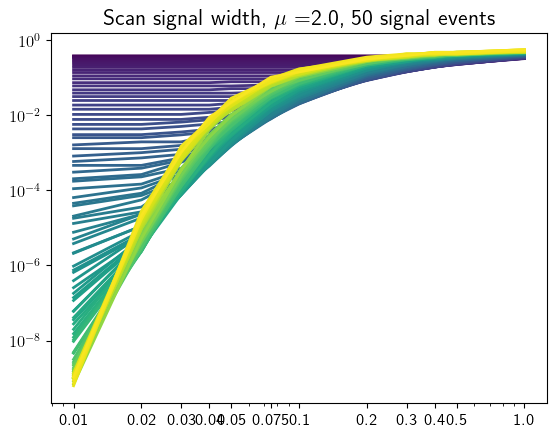

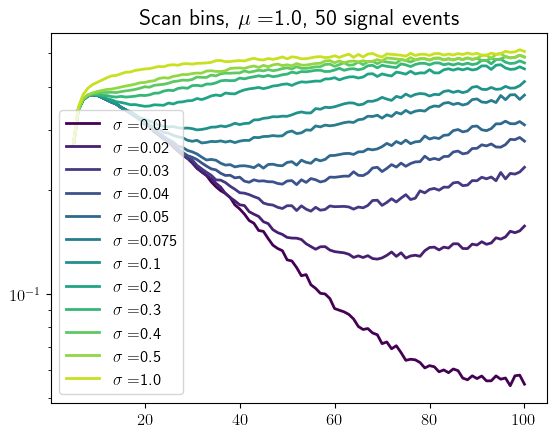

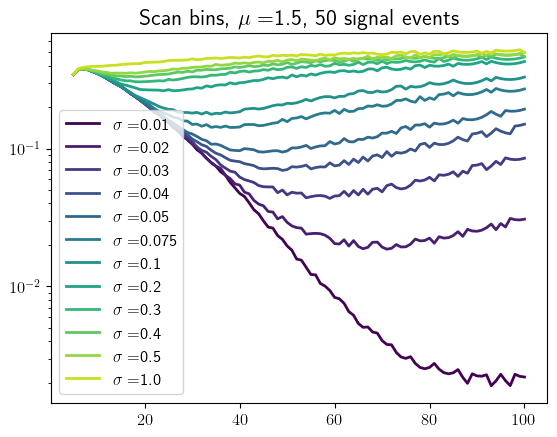

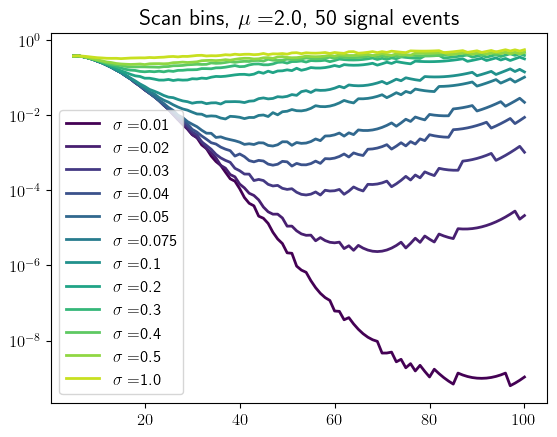

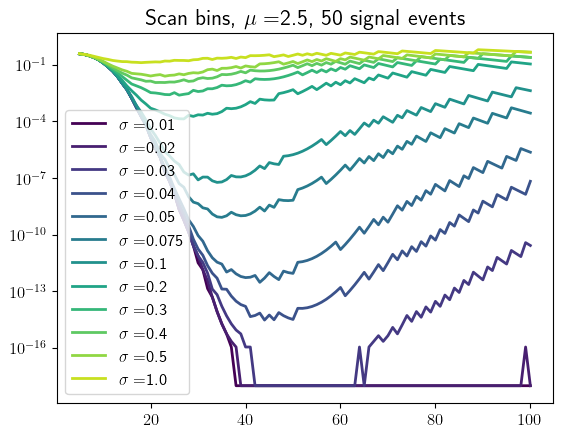

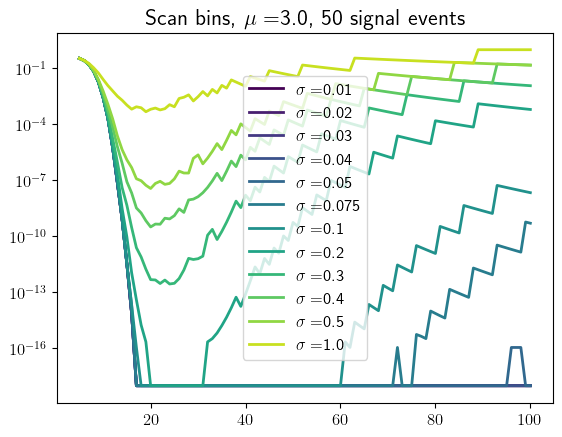

In [11]:
expected_pvalue_corrpos =np.load("results/pvalues_binned_exp/expected_pvalue_corrpos.npy")

bin_edges = 7
N_bkg = 100000
N_tests = 10
signal_positions = np.arange(1, 3.1, 0.5)
signal_widths = np.array([0.01, 0.02, 0.03, 0.04, 0.05, 0.075, 0.1, 0.2, 0.3, 0.4, 0.5, 1.])
N_bins = np.arange(5,101, 1)#np.array([3, 5, 8, 10, 15, 20, 25, 30, 35, 40, 45, 50])
N_sig = np.array([50,100,200])#, 200, 500, 1000, 2000, 5000])


ind_pos = 2
ind_width = 2
ind_sig = 0
ind_bins=3
eps = 1e-18

plt.figure()
plt.title(r"Scan signal width, $\mu=$"+str(signal_positions[ind_pos])+", "+str(N_sig[ind_sig])+" signal events")
for i, sigma in enumerate(N_bins):
    plt.plot(signal_widths, expected_pvalue_corrpos[ind_pos,:,i, ind_sig]+eps, label=str(sigma)+" bins", color=colormap(i/len(N_bins)))
#plt.plot(signal_widths, np.mean(observed_pvalue_likelihood_ratio[1,:,2,0], axis=-1)+eps, label="Observed", color=col_obs_lik)
plt.yscale("log")
plt.xscale("log")
plt.xticks(signal_widths, signal_widths)
#plt.legend()

for ind_pos in range(len(signal_positions)):
    plt.figure()
    plt.title(r"Scan bins, $\mu=$"+str(signal_positions[ind_pos])+", "+str(N_sig[ind_sig])+" signal events")
    for i, sigma in enumerate(signal_widths):
        plt.plot(N_bins, expected_pvalue_corrpos[ind_pos,i,:, ind_sig]+eps, label=r"$\sigma=$"+str(sigma), color=colormap(i/len(signal_widths)))
    #plt.plot(signal_widths, np.mean(observed_pvalue_likelihood_ratio[1,:,2,0], axis=-1)+eps, label="Observed", color=col_obs_lik)
    plt.yscale("log")
    #plt.xscale("log")
    #plt.xticks(N_bins, N_bins)
    plt.legend()

In [12]:
def find_min_bin(array, N_bins):
    best_bin_inds = np.argmin(array, axis=2)
    best_bin_inds_reverse = np.argmin(array[:,:,::-1], axis=2)

    best_bin_numbers = np.zeros((3,len(signal_positions), len(signal_widths), len(N_sig)))
    for i, p in enumerate(signal_positions):
        for j, w in enumerate(signal_widths):
            best_bin_numbers[0,i,j] = (N_bins[best_bin_inds[i,j]]+N_bins[len(N_bins)-1-best_bin_inds_reverse[i,j]])//2
            best_bin_numbers[1,i,j] = N_bins[best_bin_inds[i,j]]
            best_bin_numbers[2,i,j] = N_bins[len(N_bins)-1-best_bin_inds_reverse[i,j]]
    return best_bin_numbers

def find_min_bin_ind(array, N_bins):
    best_bin_inds = np.argmin(array, axis=2)
    best_bin_inds_reverse = np.argmin(array[:,:,::-1], axis=2)

    best_bin_numbers = np.zeros((len(signal_positions), len(signal_widths), len(N_sig)))
    for i, p in enumerate(signal_positions):
        for j, w in enumerate(signal_widths):
            best_bin_inds[i,j] = (best_bin_inds[i,j]+len(N_bins)-1-best_bin_inds_reverse[i,j])//2
    return best_bin_inds


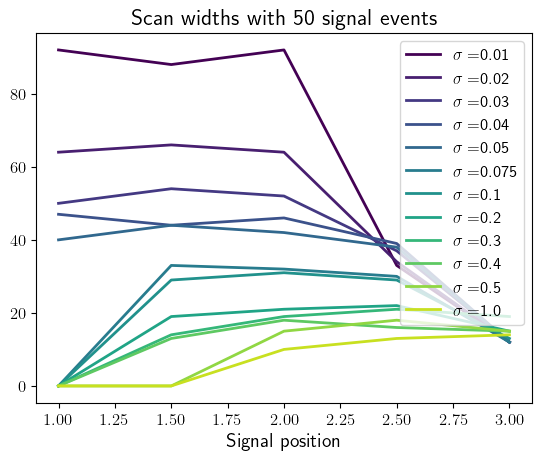

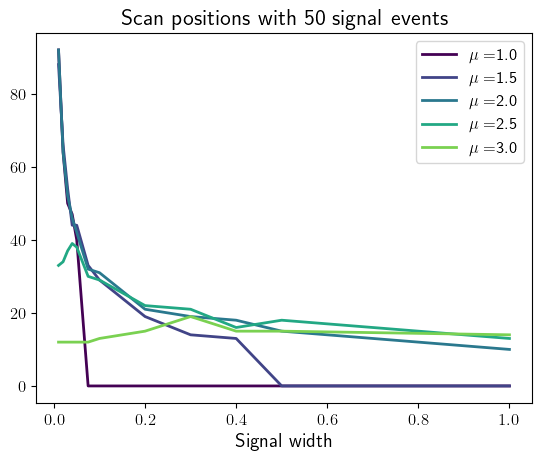

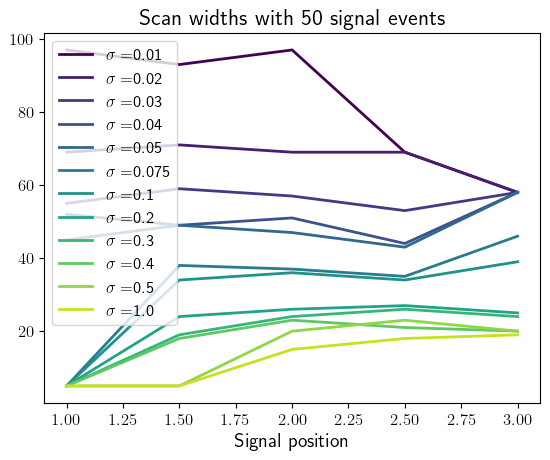

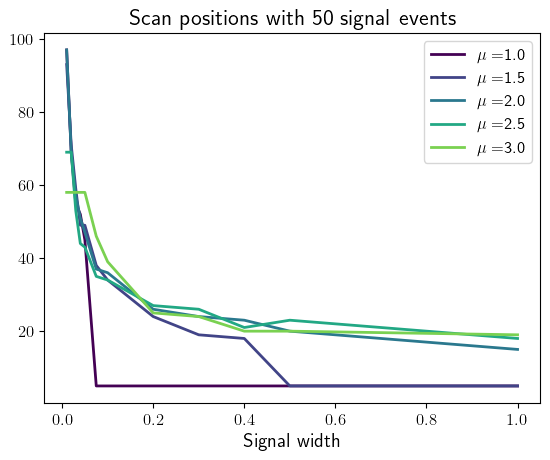

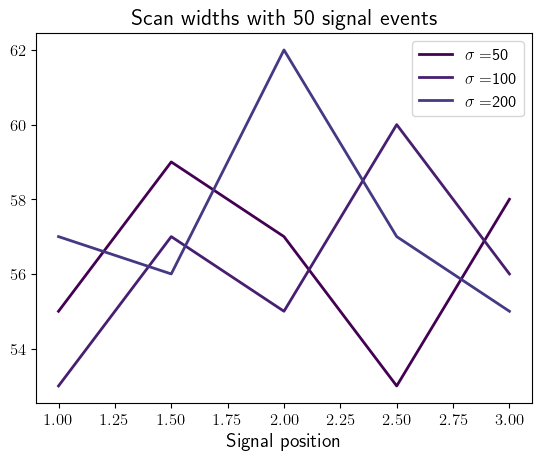

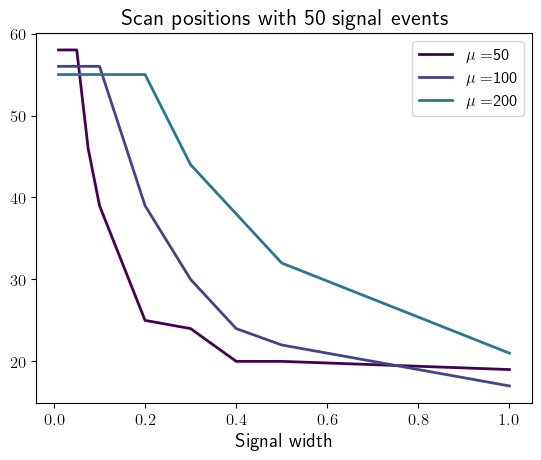

In [13]:
best_bin_number = find_min_bin(expected_pvalue_corrpos, N_bins)
best_bin_inds = np.argmin(expected_pvalue_corrpos,axis=2)
#best_bin_number = N_bins[best_bin_inds]
#best_bin_inds[expected_pvalue_corrpos[best_bin_inds]==0]=np.nan

plt.figure()
plt.title("Scan widths with "+str(N_sig[ind_sig])+" signal events")
for i, sigma in enumerate(signal_widths):
    plt.plot(signal_positions, best_bin_inds[:,i, ind_sig], label=r"$\sigma=$"+str(sigma), color=colormap(i/len(signal_widths)))
#plt.plot(signal_widths, np.mean(observed_pvalue_likelihood_ratio[1,:,2,0], axis=-1)+eps, label="Observed", color=col_obs_lik)
plt.xlabel("Signal position")
#plt.xscale("log")
#plt.xticks(N_bins, N_bins)
plt.legend()

plt.figure()
plt.title("Scan positions with "+str(N_sig[ind_sig])+" signal events")
for i, sigma in enumerate(signal_positions):
    plt.plot(signal_widths, best_bin_inds[i,:,ind_sig], label=r"$\mu=$"+str(sigma), color=colormap(i/len(signal_positions)))
#plt.plot(signal_widths, np.mean(observed_pvalue_likelihood_ratio[1,:,2,0], axis=-1)+eps, label="Observed", color=col_obs_lik)
plt.xlabel("Signal width")
#plt.xscale("log")
#plt.xticks(N_bins, N_bins)
plt.legend()


plt.figure()
plt.title("Scan widths with "+str(N_sig[ind_sig])+" signal events")
for i, sigma in enumerate(signal_widths):
    plt.plot(signal_positions, best_bin_number[0,:,i, ind_sig], label=r"$\sigma=$"+str(sigma), color=colormap(i/len(signal_widths)))
#plt.plot(signal_widths, np.mean(observed_pvalue_likelihood_ratio[1,:,2,0], axis=-1)+eps, label="Observed", color=col_obs_lik)
plt.xlabel("Signal position")
#plt.xscale("log")
#plt.xticks(N_bins, N_bins)
plt.legend()

plt.figure()
plt.title("Scan positions with "+str(N_sig[ind_sig])+" signal events")
for i, sigma in enumerate(signal_positions):
    plt.plot(signal_widths, best_bin_number[0,i,:,ind_sig], label=r"$\mu=$"+str(sigma), color=colormap(i/len(signal_positions)))
#plt.plot(signal_widths, np.mean(observed_pvalue_likelihood_ratio[1,:,2,0], axis=-1)+eps, label="Observed", color=col_obs_lik)
plt.xlabel("Signal width")
#plt.xscale("log")
#plt.xticks(N_bins, N_bins)
plt.legend()

plt.figure()
plt.title("Scan widths with "+str(N_sig[ind_sig])+" signal events")
for i, sigma in enumerate(N_sig):
    plt.plot(signal_positions, best_bin_number[0,:,ind_width, i], label=r"$\sigma=$"+str(sigma), color=colormap(i/len(signal_widths)))
#plt.plot(signal_widths, np.mean(observed_pvalue_likelihood_ratio[1,:,2,0], axis=-1)+eps, label="Observed", color=col_obs_lik)
plt.xlabel("Signal position")
#plt.xscale("log")
#plt.xticks(N_bins, N_bins)
plt.legend()

plt.figure()
plt.title("Scan positions with "+str(N_sig[ind_sig])+" signal events")
for i, sigma in enumerate(N_sig):
    plt.plot(signal_widths, best_bin_number[0,ind_pos,:,i], label=r"$\mu=$"+str(sigma), color=colormap(i/len(signal_positions)))
#plt.plot(signal_widths, np.mean(observed_pvalue_likelihood_ratio[1,:,2,0], axis=-1)+eps, label="Observed", color=col_obs_lik)
plt.xlabel("Signal width")
#plt.xscale("log")
#plt.xticks(N_bins, N_bins)
plt.legend()

(5, 12, 5, 10, 3)


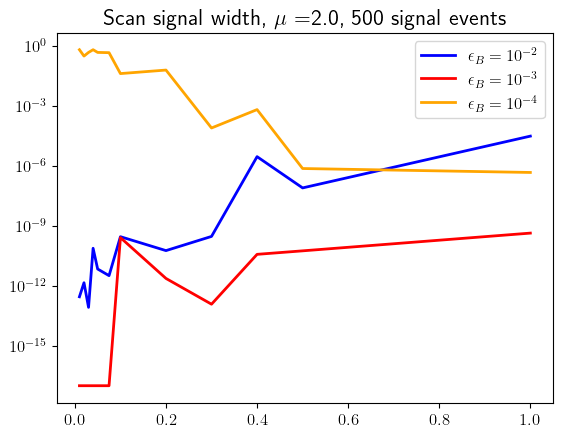

In [36]:
NN_pvalues = np.load("/hpcwork/zu992399/look_elsewhere/NN_signal/pvalues.npy")
expected_pvalue_corrpos =np.load("results/pvalues_binned_exp/expected_pvalue_corrpos.npy")
#min_ind = find_min_bin_ind(expected_pvalue_corrpos, N_bins)

signal_positions = np.arange(1, 3.1, 0.5)
signal_widths = np.array([0.01, 0.02, 0.03, 0.04, 0.05, 0.075, 0.1, 0.2, 0.3, 0.4, 0.5, 1.])
N_bins = np.arange(5,101, 1)#np.array([3, 5, 8, 10, 15, 20, 25, 30, 35, 40, 45, 50])
N_sig = np.array([50,100,200, 500, 1000])#, 200, 500, 1000, 2000, 5000])


ind_pos = 2
ind_sig =2
min_ind = find_min_bin_ind(expected_pvalue_corrpos, N_bins)
exp = np.zeros(len(signal_widths))
for i,w in enumerate(signal_widths):
    exp[i] = expected_pvalue_corrpos[ind_pos,i,min_ind[ind_pos, i,ind_sig],ind_sig]

print(NN_pvalues.shape)
ind_sig =3

eps=1e-17
plt.figure()
plt.title(r"Scan signal width, $\mu=$"+str(signal_positions[ind_pos])+", "+str(N_sig[ind_sig])+" signal events")
#plt.plot(signal_widths, exp+eps, label="Expected", color=col_exp)
plt.plot(signal_widths, np.median(NN_pvalues[ind_pos,:,ind_sig, :,0], axis=-1)+eps, label=r"$\epsilon_B=10^{-2}$", color="blue")
plt.plot(signal_widths, np.median(NN_pvalues[ind_pos,:,ind_sig, :,1], axis=-1)+eps, label=r"$\epsilon_B=10^{-3}$", color="red")
plt.plot(signal_widths, np.median(NN_pvalues[ind_pos,:,ind_sig, :,2], axis=-1)+eps, label=r"$\epsilon_B=10^{-4}$", color="orange")
plt.yscale("log")
plt.legend()

#print(NN_pvalues[ind_pos,:,ind_sig, :,2])